# Predicting heart disease using machine learning

### This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build an ML model capable of predicting whether or not someone has heart disease based on their medical attributes

We're going to take the following approach:
1. Problem Definition.
2. Data.
3. Evaluation.
4. Features.
5. Modelling.
6. Experimentation.

## 1. Problem Definition 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from Cleveland data from the UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/datasets/heart+Disease

Another version is available on Kaggle - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation 
> If we can reach 85% - 90% accuracy in predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information of each of the features in your data.

**Create a data dictionary**

1. age - age in years.
2. sex - (1 = male; 0 = female).
3. cp - chest pain.
    Type 0 : Typical angina: chest pain related decrease blood supply to the heart.
    Type 1: Atypical angina: chest pain not related to heart.
    Type 2: Non-anginal pain: typically esophageal spasms (non heart related).
    Type 3: Asymptomatic: chest pain not showing signs of disease.
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause    for concern.
5. chol - serum cholestoral in mg/dl
    a. serum = LDL + HDL + .2 * triglycerides.
    b. above 200 is cause for concern.
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   a. '>126' mg/dL signals diabetes.
7. restecg - resting electrocardiographic results
    a. Nothing to note.
    b. ST-T Wave abnormality.
      1.can range from mild symptoms to severe problems.
      2.signals non-normal heart beat.
    c. Possible or definite left ventricular hypertrophy
      1.Enlarged heart's main pumping chamber.
8. thalach - maximum heart rate achieved.
9. exang - exercise induced angina (1 = yes; 0 = no).
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy                 heart will stress more.
11. slope - the slope of the peak exercise ST segment
     a. Upsloping: better heart rate with excercise (uncommon).
     b. Flatsloping: minimal change (typical healthy heart).
     c. Downslopins: signs of unhealthy heart.
12. ca - number of major vessels (0-3) colored by flourosopy
     a. colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots).
13. thal - thalium stress result
     a. 1,3: normal.
     b. 6: fixed defect: used to be defect but ok now.
     c. 7: reversable defect: no proper blood movement when excercising.
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute).

## Preparing the tools

We'll be using Pandas, Matplotlib and Numpy for data analysis and manipulation.

In [2]:
#Importing all the tools we need
#Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
%matplotlib inline 
# We want the plots to appear inside the notebook
import matplotlib.pyplot as plt
import seaborn as sns

#Importing from Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Importing model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, plot_roc_curve, RocCurveDisplay 
from sklearn import metrics

## Load data

In [3]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape, df.size

((303, 14), 4242)

## Data exploration

The goal here is to know more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Finding how many of each class there are- 
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

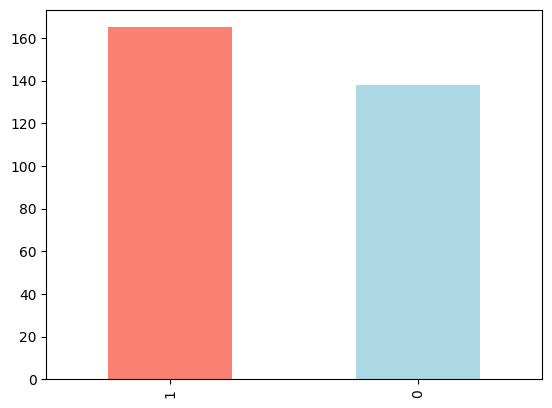

In [9]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [10]:
#Is there any data missing?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
#Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

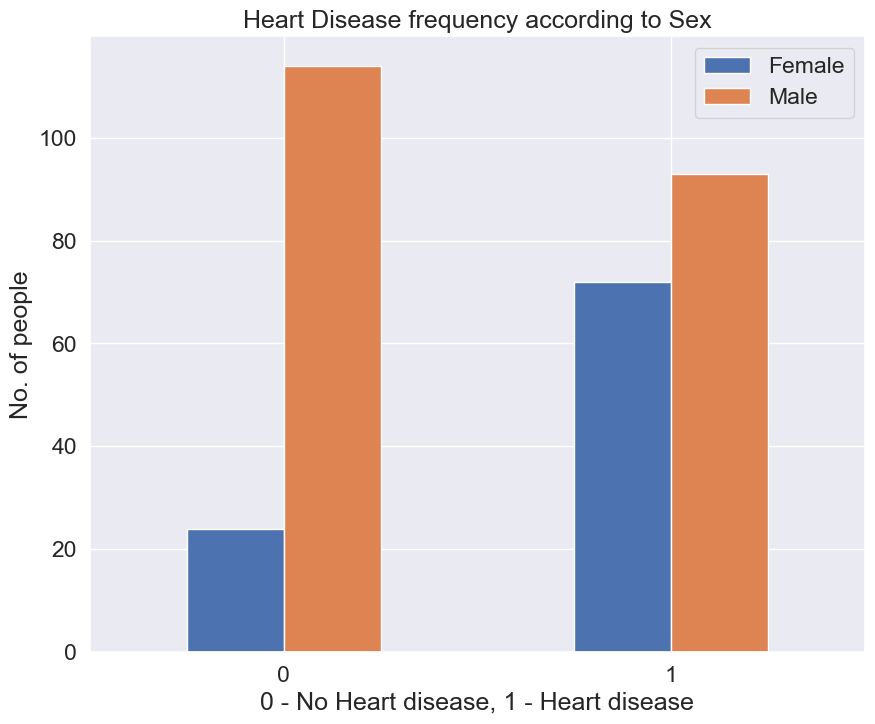

In [73]:
#Visualizing the above 
pd.crosstab(df.target, df.sex).plot(kind = 'bar', figsize = (10,8));
plt.title('Heart Disease frequency according to Sex')
plt.xlabel('0 - No Heart disease, 1 - Heart disease')
plt.ylabel('No. of people')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0)

In [15]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max heart rate for heart disease(thalach)

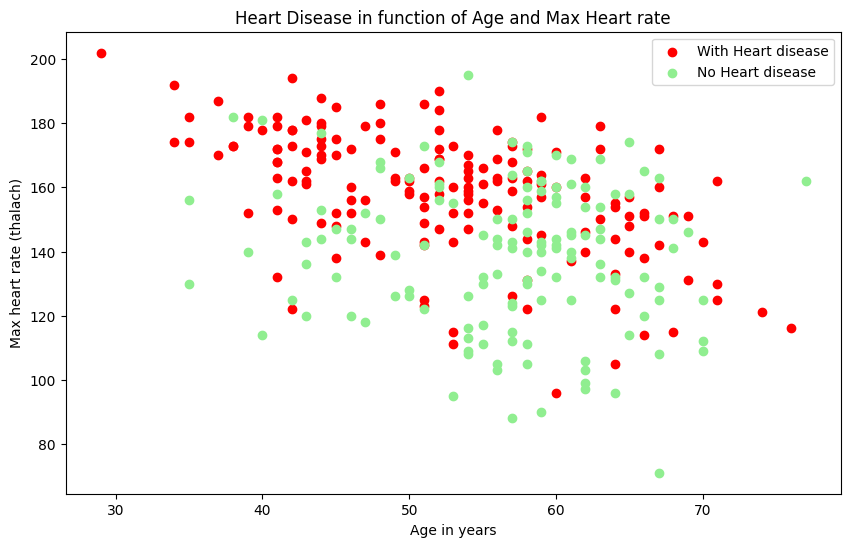

In [16]:
#Create another figure
plt.figure(figsize = (10, 6))

#Scatter with positive examples
plt.scatter(df['age'][df['target'] == 1],
            df['thalach'][df['target'] == 1],
            color = 'red');

#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            color = 'lightgreen');

plt.title('Heart Disease in function of Age and Max Heart rate')
plt.xlabel('Age in years')
plt.ylabel('Max heart rate (thalach)')
plt.legend(['With Heart disease', 'No Heart disease']);

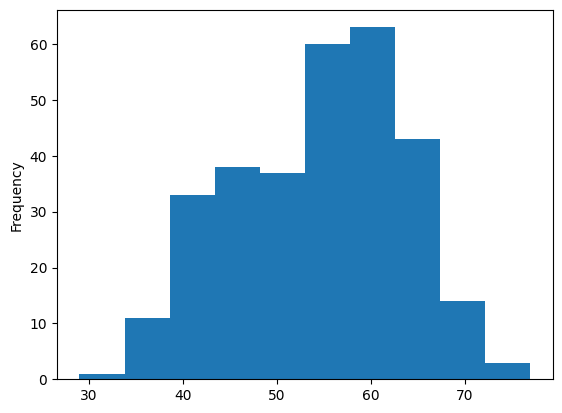

In [17]:
#Check the distribution of the age column with a histogram
df.age.plot.hist();

In [18]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

### Heart disease frequency per Chest pain type

**cp - chest pain type**

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

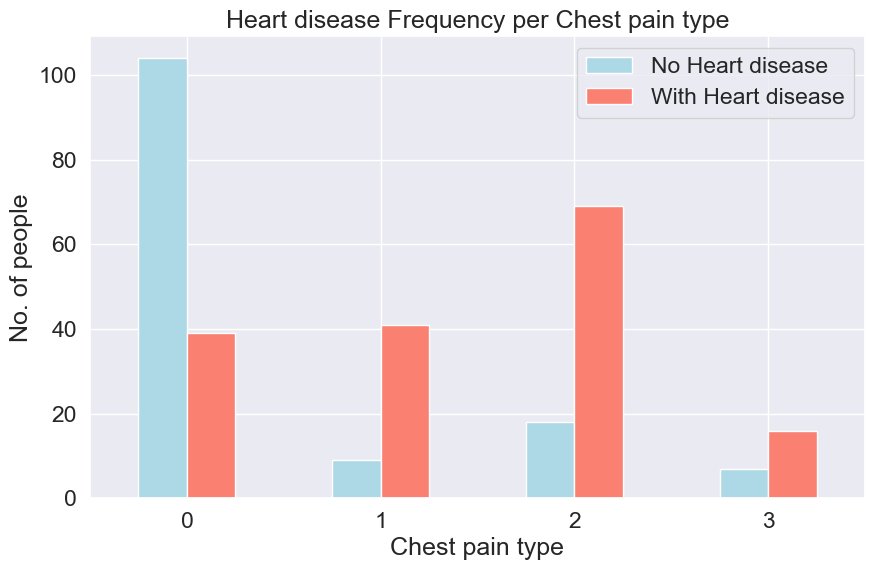

In [74]:
#Making the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = 'bar', figsize = (10, 6), color = ['lightblue', 'salmon']);

#Adding some communication
plt.title('Heart disease Frequency per Chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('No. of people')
plt.legend(['No Heart disease', 'With Heart disease']);
plt.xticks(rotation = 0);

In [20]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


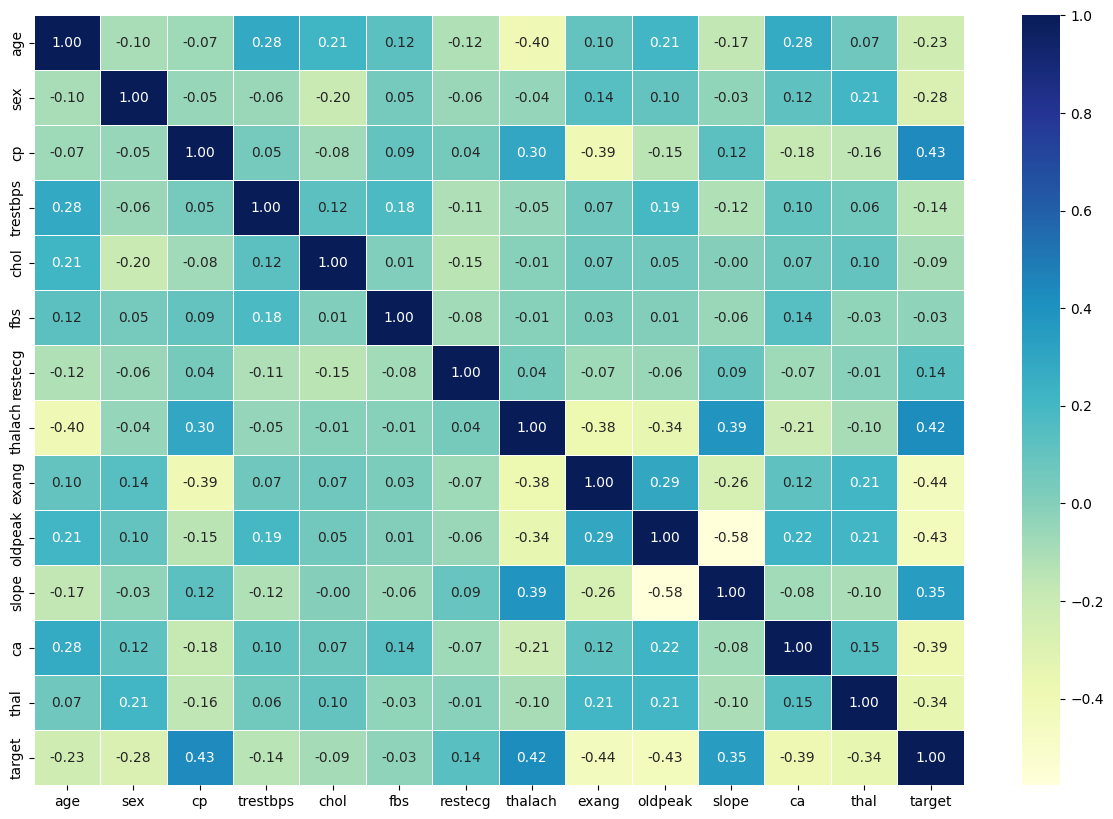

In [21]:
#Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu');

## 5. Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#Splitting into X and y
X = df.drop('target', axis = 1)
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
#Splitting into training and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


### Now we've split our data into training and test sets. It's time to build a machine learning model. We'll train it (find the patterns), on the training set and we'll test it (use the patterns) on the test set.

We'll try 3 different ML models
1. Logistic Regression.
2. K-Nearest neighbors.
3. RandomForestClassifier

In [79]:
#Put models in a dictionary
models = {'Logistic Regression' : LogisticRegression(max_iter = 5000),
          'KNN' : KNeighborsClassifier(),
          'Random Forest Classifier' : RandomForestClassifier()}

#Create a function that can fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates the given ML models.
    models - a dict of different Scikit learn ML models,
    X_train - training data (no labels)
    X_test - testing data (no labels)
    y_train - training labels
    y_test - testing labels
    
    '''
    #Set random seed
    np.random.seed(42)
    #Empty dictionary of model scores
    model_score = {}
    #Loop through models
    for name, model in models.items():
        #Fitting the model
        model.fit(X_train, y_train)
        #Evaluate the model and append it to the scores dict.
        model_score[name] = model.score(X_test, y_test)
    return model_score 

fit_and_score(models, X_train, X_test, y_train, y_test)

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

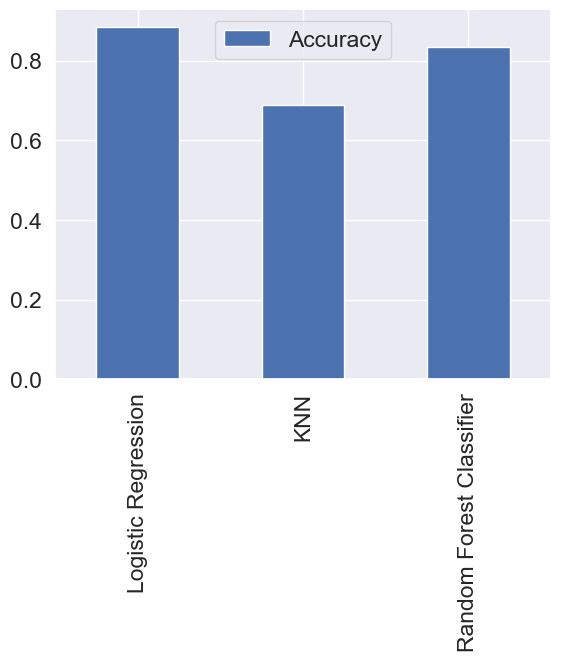

In [80]:
model_score = fit_and_score(models, X_train, X_test, y_train, y_test)
model_compare = pd.DataFrame(model_score, index = ['Accuracy'])
model_compare.T.plot.bar();

### Now we've got a baseline model..and we also know that a model's first predictions aren't always what we should base our next steps off. What should we do?

We'll look at the following
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve

## Hyperparameter tuning by hand

In [81]:
#Let's tune KNN

train_scores = []
test_scores = []

#Create a list of different values for n_neighbors
neighbors = range(1, 21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    #Fitting the algorithm
    knn.fit(X_train, y_train)
    #Update our training list
    train_scores.append(knn.score(X_train, y_train))
    #Update our test list
    test_scores.append(knn.score(X_test, y_test))

In [82]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [83]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


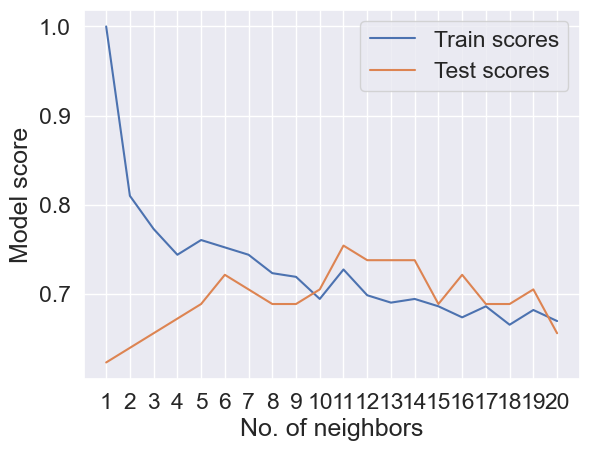

In [89]:
plt.plot(neighbors, train_scores, label = 'Train scores')
plt.plot(neighbors, test_scores, label = 'Test scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('No. of neighbors')
spacing = 0.8
fig.subplots_adjust(bottom = spacing)
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data : {max(test_scores) * 100:.2f}%')

## Hyperparameter Tuning using RandomizedSearchCV

We're going to tune-
* LogisticRegression
* RandomForestClassifier

In [90]:
#Create a hyperparameter grid for Logistic Regression
log_reg_grid = {'C' : np.logspace(-4, 4, 20),
                'solver' : ['liblinear'],
                'max_iter' : np.arange(100, 500, 50)}

#Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2)}

#### Now we've got hyperparameter tuning grids setup for each of our models, let's tune them using RandomizedSearchCV

In [97]:
#Tuning Logistic Regression

np.random.seed(42)

#Setup random hyperparameter search for Logistic Regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(max_iter = 5000),
                                param_distributions = log_reg_grid, 
                                cv = 5, 
                                n_iter = 20,
                                verbose = True)

#Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': array([100, 150, 200, 250, 300, 350, 400, 450]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [98]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 200, 'C': 0.23357214690901212}

In [99]:
#Evaluate the Randomized Search Logistic Regression model
rs_log_reg.score(X_test, y_test)

0.8852459016393442

#### Now we'll do the same for RandomForestClassifier()

In [100]:
#Tuning RandomForestClassifier

np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

#Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [101]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [102]:
#Evaluate the Randomized Search RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8688524590163934

### Hyperparameter tuning by hand -> eliminates KNN, Hyperparameter tuning using RandomizedSearch -> eliminates RandomForestClassifier. Now we'll focus on Logistic Regression, this time using GridSearchCV, due to better results.

In [138]:
#Different hyperparameters for our LogisticRegression model
log_reg_grid = {'C' : np.logspace(-4, 4, 30),
                'solver' : ['liblinear']}
#Setting up Grid parameter search for Logistic Regression model
gs_log_reg = GridSearchCV(LogisticRegression(max_iter = 5000),
                          param_grid = log_reg_grid,
                          n_jobs = -1,
                          cv = 5,
                          verbose = True)
#Fitting grid parameter search models
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [139]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [140]:
#Evaluating the grid search logistic regression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned ML classifer, beyond it's accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score
### and it would be great if cross-validation was used wherever possible

**To make predictions and evaluate our trained model, first we need to make predictions**

In [106]:
#Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [107]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## ROC curve helps us comparing the model's true positive rate to its false positive rate thus giving us an idea about it's performance.

/Users/ajinkyagajbhiye/Desktop/sample_project/heart-disease-project/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


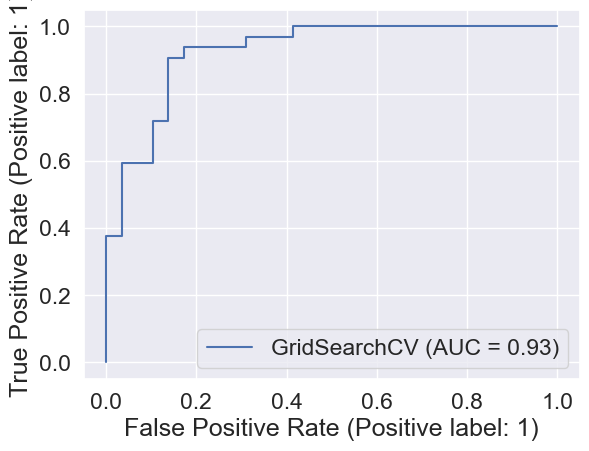

In [108]:
#Already imported. So now plot ROC curve and calculate the AUC score
plot_roc_curve(gs_log_reg, X_test, y_test);

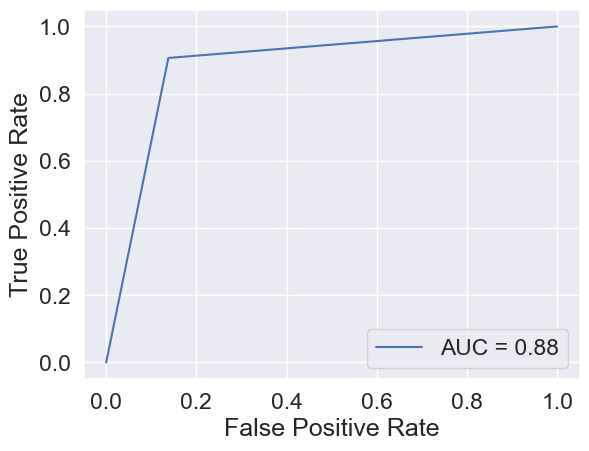

In [109]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds)
roc_auc = metrics.auc(fpr, tpr)
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()
plt.show()

<AxesSubplot: >

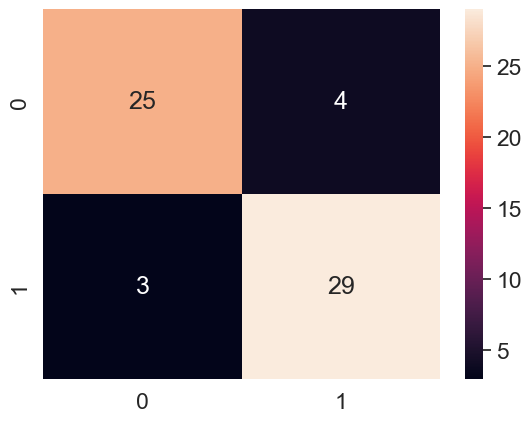

In [110]:
#Confusion matrix with heatmap
sns.heatmap(confusion_matrix(y_test, y_preds), annot = True)

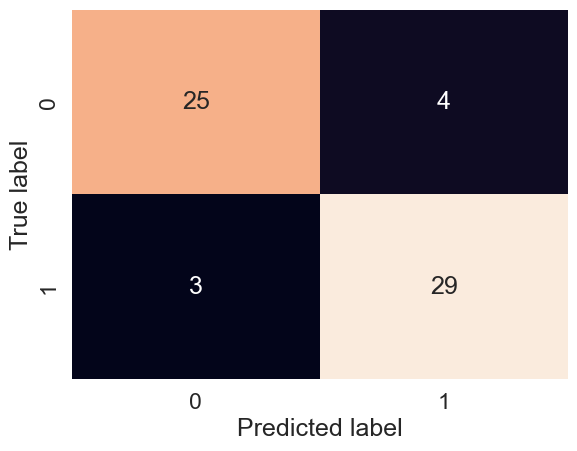

In [111]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking Confusion matrix using Seaborn's heatmap
    '''
    fig, ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, cbar = False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
plot_conf_mat(y_test, y_preds)

**Now we've got a ROC curve, AUC score and a confusion matrix, now we'll focus on getting a classification report as well as cross-validated precision, recall and F1_score**

In [112]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross validation
**We're going to evaluate accuract, precision, recall and f1_score using cross validation and to do so, we'll use 'cross_val_score'**

In [113]:
#Check best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [114]:
#Create a new classifier with best params
clf = LogisticRegression(C= 0.20433597178569418, solver = 'liblinear')

In [115]:
#Cross validation accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [116]:
acc_score = np.mean(cv_acc)
acc_score

0.8446994535519124

In [117]:
#Cross validation precision
cv_prec = cross_val_score(clf, X, y, cv = 5, scoring = 'precision')
prec_score = np.mean(cv_prec)
prec_score

0.8207936507936507

In [118]:
#Cross validation recall
cv_recall = cross_val_score(clf, X, y, cv = 5, scoring = 'recall')
recall_score = np.mean(cv_recall)
recall_score

0.9212121212121213

In [119]:
#Cross validation f1 score
cv_f1 = cross_val_score(clf, X, y, cv = 5, scoring = 'f1')
f1_score = np.mean(cv_f1)
f1_score

0.8673007976269721

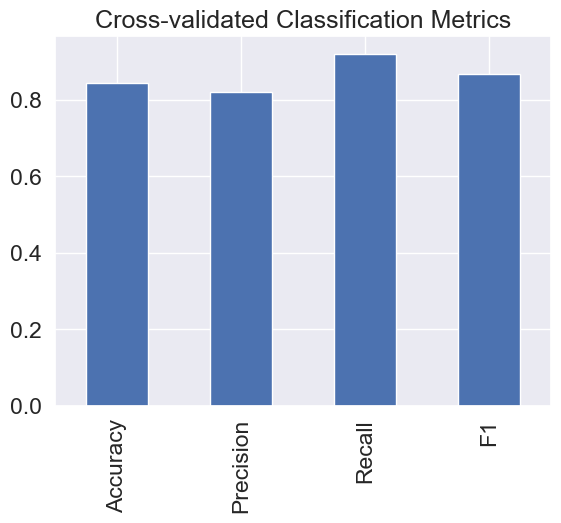

In [120]:
#Visualizing the cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy' : acc_score,
                           'Precision' : prec_score,
                           'Recall' : recall_score,
                           'F1' : f1_score},
                          index = [0])
cv_metrics.T.plot.bar(title = 'Cross-validated Classification Metrics',
                      legend = False);

## Feature Importance
**Feature importance is like asking - which features affected the outcome the most and how did they contribute?**

**Finding feature importance is different for each ML model. One way to find is to search : (model name) feature importance**

**Let's find Feature importance for our Logistic Regression model**

In [121]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [122]:
#Fit an instance of Logistic Regression
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [123]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [124]:
#Check coef_
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [125]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [126]:
#Match coefs of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

<AxesSubplot: title={'center': 'Feature Importance'}>

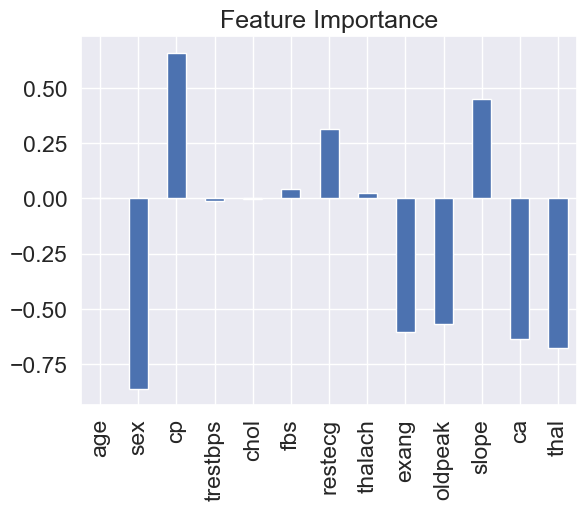

In [127]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance',
                      legend = False)

In [128]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


### Here as the sex increases, the ratio between decreases, causing a negative relation

In [129]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


## Experimentation

If you haven't hit your evaluation metric yet....ask yourself-
* Could you collect more data?
* Could you try a better model? Like Catboost or XGboost
* Could you improve the current model? (beyond what we've done so far)
* And if your model is already good enough (you've hit the evaluation metric) how can you export the model and share it with others?

In [130]:
import sys
!conda install --yes --prefix {sys.prefix} xgboost

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [131]:
import sys
!conda install --yes --prefix {sys.prefix} lightgbm

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [132]:
import sys
!conda install --yes --prefix {sys.prefix} catboost

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [136]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


models2 = {'Gradient Boosting Regressor' : GradientBoostingClassifier(),
           'Histogram based Gradient Boosting' : HistGradientBoostingClassifier(),
           'XG Boost' : XGBClassifier(use_label_encoder = False),
           'Light GBM' : LGBMClassifier(),
           'Cat Boost' : CatBoostClassifier(verbose=0, n_estimators=200)}

def fit_and_score2(models2, X_train, X_test, y_train, y_test):

    np.random.seed(42)
    
    model_scores2 = {}
    
    for name, model in models2.items():
        model.fit(X_train, y_train)
        model_scores2[name] = model.score(X_test, y_test)
    return model_scores2

fit_and_score2(models2, X_train, X_test, y_train, y_test)

/Users/ajinkyagajbhiye/Desktop/sample_project/heart-disease-project/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/ajinkyagajbhiye/Desktop/sample_project/heart-disease-project/env/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


[11:13:56] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 1.6 s, sys: 178 ms, total: 1.78 s
Wall time: 609 ms


{'Gradient Boosting Regressor': 0.7704918032786885,
 'Histogram based Gradient Boosting': 0.819672131147541,
 'XG Boost': 0.819672131147541,
 'Light GBM': 0.8360655737704918,
 'Cat Boost': 0.8524590163934426}

In [134]:
cat = CatBoostClassifier(verbose = 0, random_state = 42)
parameters = {'depth'         : [4, 5, 6, 7, 8, 9, 10],
              'learning_rate' : [0.01, 0.02, 0.03, 0.04],
              'iterations'    : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
                 }
Grid_CBC = GridSearchCV(estimator = cat, param_grid = parameters, cv = 5, n_jobs=-1)
Grid_CBC.fit(X_train, y_train)

/Users/ajinkyagajbhiye/Desktop/sample_project/heart-disease-project/env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ajinkyagajbhiye/Desktop/sample_project/heart-disease-project/env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ajinkyagajbhiye/Desktop/sample_project/heart-disease-project/env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/ajinkyagajbhiye/Desktop/sample_pr

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fa075d72da0>,
             n_jobs=-1,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [137]:
Grid_CBC.score(X_test, y_test)

0.8360655737704918

In [182]:
print(f'Our best model is GridSearchCV Logistic Regression model that gives the accuracy score of {gs_log_reg.score(X_test, y_test)*100:.2f}%')

Our best model is GridSearchCV Logistic Regression model that gives the accuracy score of 88.52%


# After experimentation, we've concluded that our GridSearch Cross validation Logistic Regression model (gs_log_reg) gives us the best results of 88.52% accuracy when finding out whether a person has heart disease or not.
